In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import timeit

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tqdm.notebook import tqdm

In [4]:
train = pd.read_csv("/Users/user/Desktop/Data Science Projects/Otto Group /data/train.csv")
test = pd.read_csv("/Users/user/Desktop/Data Science Projects/Otto Group /data/test.csv")

In [5]:
features = train.iloc[:,1:94]
train_labels = train.iloc[:,94]

In [6]:
normalized_train_features = (features-features.mean())/features.std()

In [7]:
# X_train, X_val, y_train, y_val = train_test_split(normalized_train_features, train_labels, test_size=0.2,
#                                                   stratify=train_labels, random_state=69)

In [17]:
normalized_train_features.loc[:,"target"] = train_labels

In [19]:
normalized_train_features.insert(0,"id", train['id'])

In [21]:
df = normalized_train_features

#### Real Testing Data

In [37]:
test_features = test.iloc[:,1:94]
normalized_test_features = (test_features-test_features.mean())/test_features.std()

## KNN

In [6]:
%%time

k_values = [1,2,3,4,8,16,32,64] + list(range(100,1101,250))

all_train_acc = []
all_test_acc = []
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    
    train_pred = KNN.predict(X_train)
    test_pred = KNN.predict(X_val)
    
    train_acc = accuracy_score(train_pred,y_train)
    test_acc = accuracy_score(test_pred,y_val)
    
    all_train_acc.append(train_acc)
    all_test_acc.append(test_acc)

CPU times: user 19min 5s, sys: 5min 11s, total: 24min 17s
Wall time: 19min 27s


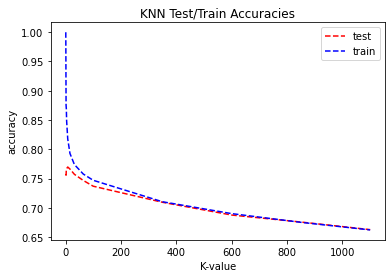

In [17]:
fig = plt.figure()
plt.plot(k_values,all_test_acc, 'r--', label='test')
plt.plot(k_values,all_train_acc, 'b--', label='train')
plt.legend()
plt.title('KNN Test/Train Accuracies')
plt.xlabel('K-value')
plt.ylabel('accuracy');

In [20]:
%%time

k_values = [1,2,3,5,9,15,25,35,45,65,75,85,100]

all_train_acc = []
all_test_acc = []
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    
    train_pred = KNN.predict(X_train)
    test_pred = KNN.predict(X_val)
    
    train_acc = accuracy_score(train_pred,y_train)
    test_acc = accuracy_score(test_pred,y_val)
    
    all_train_acc.append(train_acc)
    all_test_acc.append(test_acc)

CPU times: user 18min 33s, sys: 5min 4s, total: 23min 38s
Wall time: 18min 47s


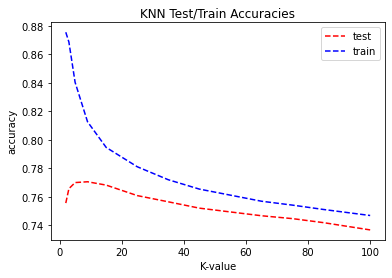

In [24]:
fig = plt.figure()
plt.plot(k_values[1:],all_test_acc[1:], 'r--', label='test')
plt.plot(k_values[1:],all_train_acc[1:], 'b--', label='train')
plt.legend()
plt.title('KNN Test/Train Accuracies')
plt.xlabel('K-value')
plt.ylabel('accuracy');

In [92]:
%%time

k_values = [9] #[64,84,100,128]

all_train_acc = []
all_test_acc = []
for k in k_values:
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train,y_train)
    
    train_pred = KNN.predict(X_train)
    test_pred = KNN.predict(X_val)
    
    train_acc = accuracy_score(train_pred,y_train)
    test_acc = accuracy_score(test_pred,y_val)
    
    all_train_acc.append(train_acc)
    all_test_acc.append(test_acc)

CPU times: user 1min 31s, sys: 23.8 s, total: 1min 54s
Wall time: 1min 33s


In [93]:
test_acc

0.7706043956043956

[[45.3  5.2  1.   0.5  0.5  6.   4.4 14.2 22.8]
 [ 0.  85.3 12.7  0.9  0.2  0.2  0.5  0.2  0.2]
 [ 0.1 52.3 44.6  1.6  0.1  0.1  1.2  0.1  0. ]
 [ 0.  49.4 18.4 29.   0.2  2.   0.6  0.   0.4]
 [ 0.   3.5  0.4  0.2 95.6  0.2  0.   0.2  0. ]
 [ 0.7  1.6  0.4  0.1  0.2 92.3  1.3  2.   1.5]
 [ 5.1 17.1  9.5  0.5  1.4  5.3 54.8  4.9  1.4]
 [ 2.8  2.6  0.7  0.1  0.5  3.6  1.5 86.6  1.7]
 [ 3.1  3.8  0.5  0.3  0.4  3.8  0.7  3.2 84.1]]


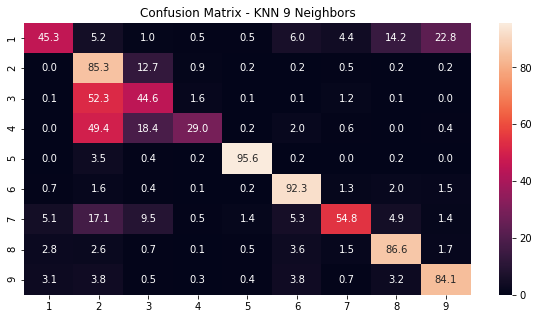

In [95]:
conf = sklearn.metrics.confusion_matrix(y_val, test_pred, normalize = 'true')*100
print(np.round(conf,1))
plt.figure(figsize = (10,5))
sns.heatmap(np.round(conf,1),
           xticklabels = list(range(1,10)),
           yticklabels = list(range(1,10)),
           annot=True, fmt=".1f");
plt.title("Confusion Matrix - KNN 9 Neighbors");

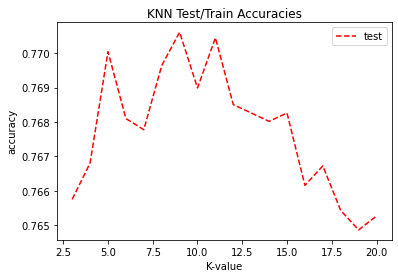

In [28]:
fig = plt.figure()
plt.plot(k_values[1:],all_test_acc[1:], 'r--', label='test')
#plt.plot(k_values[1:],all_train_acc[1:], 'b--', label='train')
plt.legend()
plt.title('KNN Test/Train Accuracies')
plt.xlabel('K-value')
plt.ylabel('accuracy');

Max acc=77.06 at K=9

## KNN for Probabilities

In [23]:
from sklearn.model_selection import StratifiedKFold

In [24]:
train.loc[:,"kfold"] = -1

df = train.sample(frac=1)#.reset_index(drop=True)
targets = df['target'].values

skf = StratifiedKFold(n_splits = 5)

for fold, (trn,val) in enumerate(skf.split(X=df, y=targets)):
    df.loc[val, "kfold"] = fold

In [30]:
def fold_dataset(fold):
    train_df = df[df.kfold != fold]#.reset_index(drop=True)
    valid_df = df[df.kfold == fold]#.reset_index(drop=True)

    feature_columns = df.drop(['id','target','kfold'], axis=1).columns

    xtrain = train_df[feature_columns]
    ytrain = train_df['target']

    xvalid = valid_df[feature_columns]
    yvalid = valid_df['target']
    
    return(xtrain,ytrain,xvalid,yvalid)

In [55]:
fold_dataset(0)[2].index

Int64Index([ 8562,  5516,  8364,   987, 10561, 11630, 12096, 11160,  3361,
             7082,
            ...
             1676, 10926, 11920,  7269,  2211,  1140,   587,   608,  1237,
            12059],
           dtype='int64', length=12376)

In [119]:
%%time

k_values = [128]#[3,5,9,15,32,64,128,256,512,1024]

for k in tqdm(k_values):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN_predictions = {}
    
    fold_preds = []
    for fold_num in range(5):
        xtrain = fold_dataset(fold_num)[0]
        ytrain = fold_dataset(fold_num)[1]
        xvalid = fold_dataset(fold_num)[2]
        yvalid = fold_dataset(fold_num)[3]

        KNN.fit(xtrain,ytrain)

    #     test_pred_proba = KNN.predict_proba(normalized_test_features)
        test_pred_proba = KNN.predict_proba(xvalid) # TRAIN data

        test_proba_df = pd.DataFrame(test_pred_proba)
        test_proba_df.set_index(xvalid.index)

        #test_proba_df.columns = ['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9']
        fold_preds.append(test_proba_df.reset_index())
    pred = pd.concat(fold_preds, ignore_index=True)
    #         test_proba_df.insert(0,"id", test['id'])

    #         KNN_predictions[f'KNN_Train_{k}_Neigh'] = test_proba_df
    

  0%|          | 0/1 [00:00<?, ?it/s]

CPU times: user 1min 27s, sys: 24.9 s, total: 1min 52s
Wall time: 1min 30s


In [120]:
pred

,index,0,1,2,3,4,5,6,7,8
0,0,0.351562,0.281250,0.367188,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,1,0.531250,0.382812,0.085938,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
2,2,0.320312,0.656250,0.007812,0.000000,0.000000,0.007812,0.007812,0.000000,NaN
3,3,0.000000,0.000000,0.000000,0.000000,0.171875,0.039062,0.164062,0.625000,NaN
4,4,0.226562,0.507812,0.132812,0.015625,0.007812,0.015625,0.015625,0.078125,NaN
...,...,...,...,...,...,...,...,...,...,...
61873,12370,0.062500,0.000000,0.000000,0.000000,0.000000,0.398438,0.289062,0.250000,NaN
61874,12371,0.304688,0.179688,0.031250,0.070312,0.023438,0.234375,0.070312,0.085938,NaN
61875,12372,0.593750,0.054688,0.039062,0.015625,0.000000,0.281250,0.015625,0.000000,NaN
61876,12373,0.281250,0.062500,0.015625,0.039062,0.000000,0.453125,0.023438,0.125000,NaN


In [121]:
pred = pred.fillna(0)

In [122]:
np.array(pred)

array([[0.000000e+00, 3.515625e-01, 2.812500e-01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 5.312500e-01, 3.828125e-01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [2.000000e+00, 3.203125e-01, 6.562500e-01, ..., 7.812500e-03,
        0.000000e+00, 0.000000e+00],
       ...,
       [1.237200e+04, 5.937500e-01, 5.468750e-02, ..., 1.562500e-02,
        0.000000e+00, 0.000000e+00],
       [1.237300e+04, 2.812500e-01, 6.250000e-02, ..., 2.343750e-02,
        1.250000e-01, 0.000000e+00],
       [1.237400e+04, 5.703125e-01, 3.125000e-02, ..., 1.875000e-01,
        2.343750e-02, 0.000000e+00]])

In [123]:
np.argmax(np.array(pred),axis=1)

array([3, 0, 0, ..., 0, 0, 0])

In [108]:
class2idx = {
    'Class_1':0,
    'Class_2':1,
    'Class_3':2,
    'Class_4':3,
    'Class_5':4,
    'Class_6':5,
    'Class_7':6,
    'Class_8':7,
    'Class_9':8,
}

idx2class = {v: k for k, v in class2idx.items()}

train_labels.replace(class2idx, inplace=True)

In [124]:
accuracy_score(np.argmax(np.array(pred),axis=1),train_labels)

0.031174246097158926

CPU times: user 42min 42s, sys: 11min 58s, total: 54min 41s
Wall time: 46min 17s

In [79]:
import os

In [13]:
for i in KNN_predictions:
    KNN_predictions[i].to_csv(f'/Users/user/Desktop/Data Science Projects/Otto Group /KNN Predictions/{i}.csv',
                              header = True, index = False)